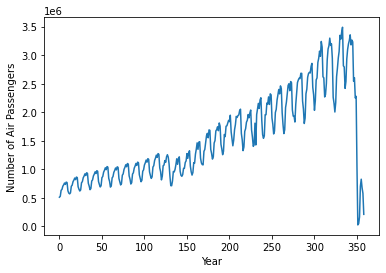

In [52]:
#import all necessary libraries
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras import regularizers
import math
from sklearn.metrics import mean_squared_error

# upload the dataset
dataframe = pd.read_excel('prova.xlsx', usecols=[1], skipfooter=3)
plt.xlabel("Year")
plt.ylabel("Number of Air Passengers")
plt.plot(dataframe)
plt.show()

# scale the dataset
from sklearn.preprocessing import MinMaxScaler
dataset = dataframe.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test set
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


In [44]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


look_back = 4
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [45]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras import regularizers

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=["accuracy"])

# train the model
model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=2)

# model summary
model.summary()

Epoch 1/100
282/282 - 5s - loss: 0.0589 - accuracy: 0.0000e+00
Epoch 2/100
282/282 - 1s - loss: 0.0106 - accuracy: 0.0000e+00
Epoch 3/100
282/282 - 1s - loss: 0.0075 - accuracy: 0.0000e+00
Epoch 4/100
282/282 - 1s - loss: 0.0053 - accuracy: 0.0000e+00
Epoch 5/100
282/282 - 1s - loss: 0.0041 - accuracy: 0.0000e+00
Epoch 6/100
282/282 - 1s - loss: 0.0035 - accuracy: 0.0000e+00
Epoch 7/100
282/282 - 1s - loss: 0.0033 - accuracy: 0.0000e+00
Epoch 8/100
282/282 - 1s - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 9/100
282/282 - 1s - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 10/100
282/282 - 1s - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 11/100
282/282 - 1s - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 12/100
282/282 - 1s - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 13/100
282/282 - 1s - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 14/100
282/282 - 1s - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 15/100
282/282 - 1s - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 16/100
282/282 - 1s - loss: 0.0023 - accura

In [46]:
import math
from sklearn.metrics import mean_squared_error

# make predictions
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# calculate root mean squared error (RMSE)
train_score = math.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
print('Train Score: %.2f RMSE' % (train_score))
test_score = math.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
print('Test Score: %.2f RMSE' % (test_score))

Train Score: 136265.97 RMSE
Test Score: 342526.82 RMSE


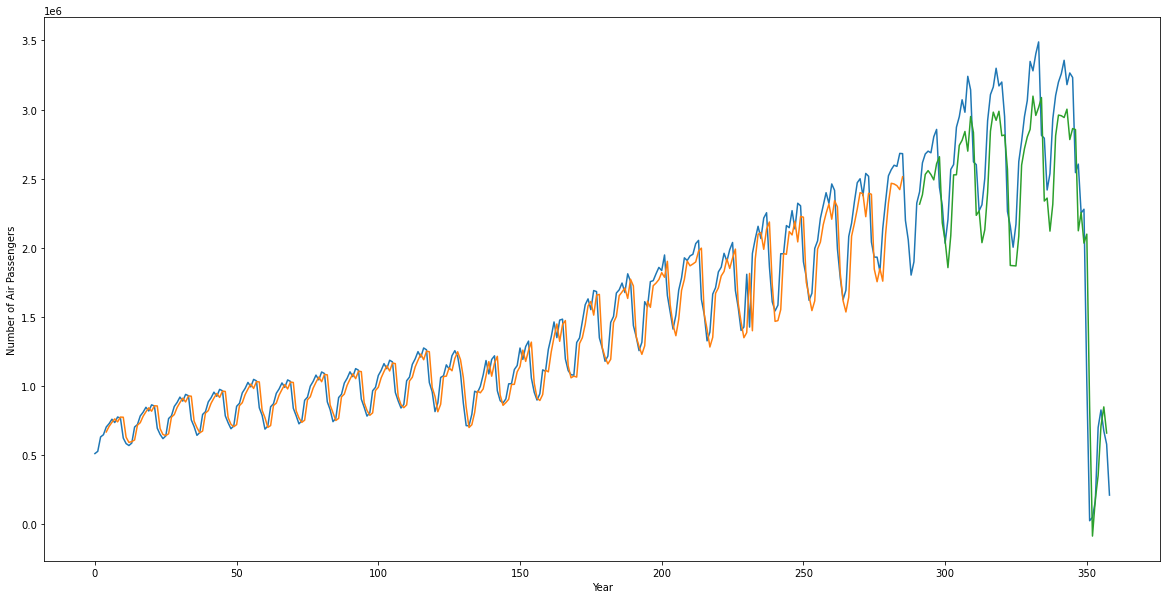

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(dataset)-1, :] = test_predict

# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.xlabel("Year")
plt.ylabel("Number of Air Passengers")
plt.plot(scaler.inverse_transform(dataset)) # real values
plt.plot(trainPredictPlot) # train values
plt.plot(testPredictPlot) # test values
plt.show()

In [48]:
print(x_train)
print(y_train)

[[[0.14025225 0.14488043 0.17496358 0.17959175]]

 [[0.14488043 0.17496358 0.17959175 0.19579037]]

 [[0.17496358 0.17959175 0.19579037 0.20273264]]

 ...

 [[0.66690755 0.7203167  0.7332341  0.74245685]]

 [[0.7203167  0.7332341  0.74245685 0.74005264]]

 [[0.7332341  0.74245685 0.74005264 0.7671574 ]]]
[[ 705063.74873884  729100.04038216  761148.37764748  737112.13759659
   777172.57207636  769160.47486192  624942.87977932  584882.44529956
   570907.70835669  588748.5752505   704714.21006027  722555.07695408
   784998.16267485  811759.41142314  847441.14521076  820679.84487004
   865282.01210457  856361.57865766  695793.77661337  651191.66097126
   620630.47535315  640025.20289955  766090.77717388  785485.45312785
   853366.8963554   882458.93608258  921248.33958295  892156.3514482
   940643.06712935  930945.65176373  756393.41340068  707906.6461271
   644592.47390464  664735.96231335  795668.81754344  815812.35754457
   886314.64436369  916529.79958812  956816.87959038  926601.56958